In [30]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [31]:
# Reading dataset
# https://www.kaggle.com/datasets/anninasimon/employee-salary-dataset?resource=download
df=pd.read_csv('/content/Employee_Salary_Dataset.csv')


In [32]:
# Viewing the first 5 rows of the dataset
df.head()

,ID,Experience_Years,Age,Gender,Salary
0,1,5,28,Female,250000
1,2,1,21,Male,50000
2,3,3,23,Female,170000
3,4,2,22,Male,25000
4,5,1,17,Male,10000


In [33]:
#Total rows and columns in our dataset
df.shape

(35, 5)

In [34]:
#information about all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                35 non-null     int64 
 1   Experience_Years  35 non-null     int64 
 2   Age               35 non-null     int64 
 3   Gender            35 non-null     object
 4   Salary            35 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [35]:
# Statistical summary of the dataset
df.describe()

,ID,Experience_Years,Age,Salary
count,35.000000,35.00000,35.000000,3.500000e+01
mean,18.000000,9.20000,35.485714,2.059147e+06
std,10.246951,7.55295,14.643552,3.170124e+06
min,1.000000,1.00000,17.000000,3.000000e+03
25%,9.500000,2.50000,22.500000,2.250000e+04
50%,18.000000,6.00000,29.000000,2.500000e+05
75%,26.500000,15.00000,53.500000,3.270000e+06
max,35.000000,27.00000,62.000000,1.000000e+07


In [36]:
#Finding toatal number of missing values columnwise
df.isnull().sum()

,0
ID,0
Experience_Years,0
Age,0
Gender,0
Salary,0


In [37]:
# Finding maxium salary in the dataset
df['Salary'].max()

10000000

In [38]:
# Finding minimum salary in the dataset
df['Salary'].min()

3000

In [39]:
# Accessing the specific row
df.loc[27:28,'Experience_Years']

,Experience_Years
27,27
28,19


In [40]:
# Counting the specific gender
Gender_counts = df['Gender'].value_counts()
print(Gender_counts)

Gender
Female    18
Male      17
Name: count, dtype: int64


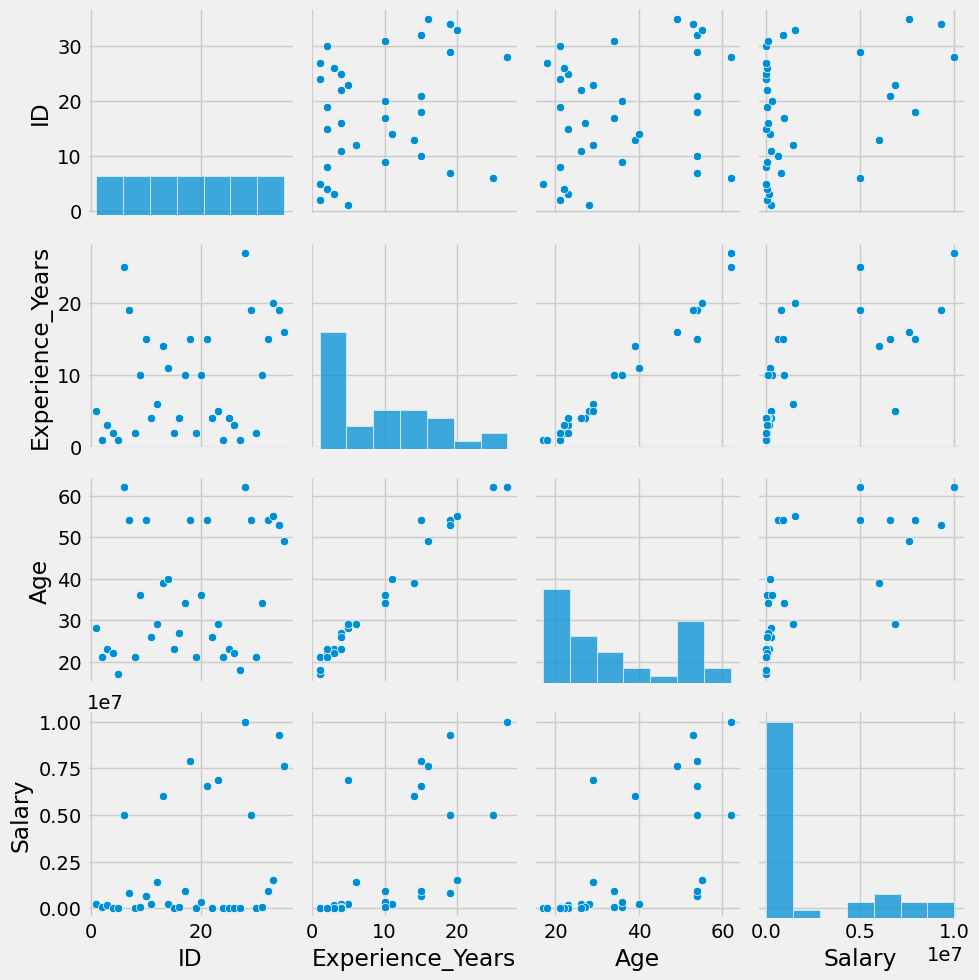

In [41]:
# Univariate, Bivariate and Multivariate Analysis
sns.pairplot(df)

##Bar Graph

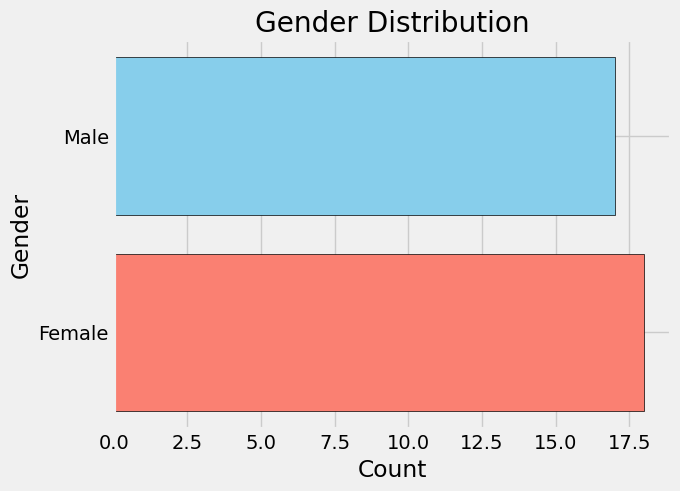

In [42]:
# Plotting the Gender Distribution
plt.barh(Gender_counts.index,Gender_counts.values,color=['salmon','skyblue'],edgecolor='black')
plt.style.use('fivethirtyeight')
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Gender Distribution")
plt.grid(True)
plt.show()

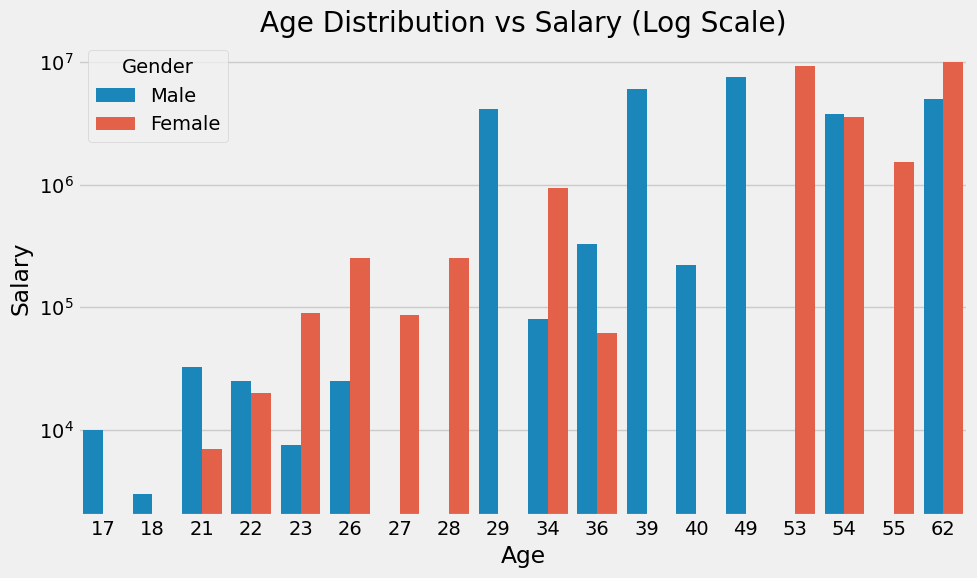

In [43]:
#Bar Ghraph for visualizing Age distribution vs Salary in the dataset based on gender
plt.figure(figsize=(10,6))
sns.barplot(x='Age',y='Salary',hue='Gender',data=df,errorbar=('ci', False))
plt.yscale('log')
plt.title('Age Distribution vs Salary (Log Scale)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()



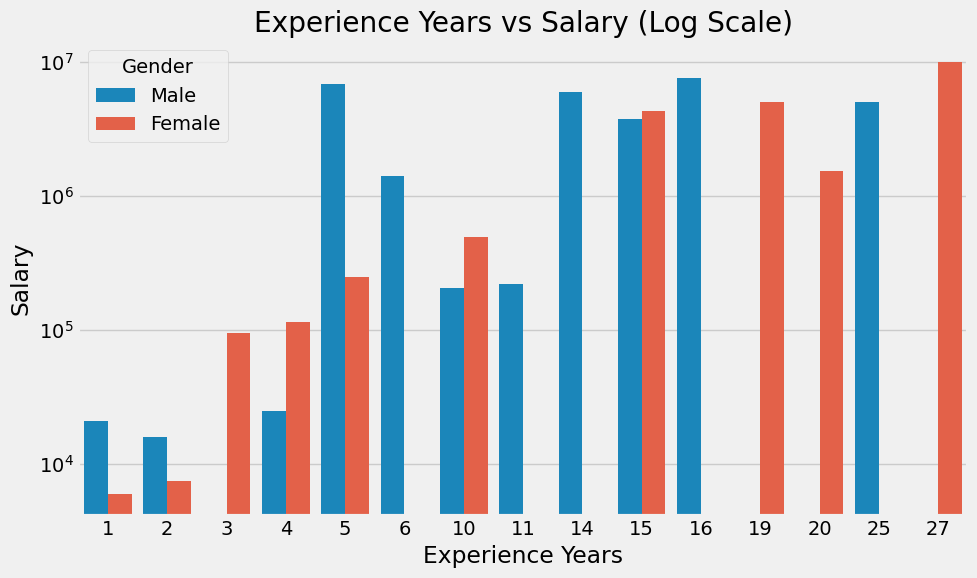

In [44]:
# Plotting the Experience Years vs Salary in the dataset based on gender
plt.figure(figsize=(10,6))
sns.barplot(x ='Experience_Years',y='Salary',hue='Gender',data = df,errorbar=('ci', False))
plt.yscale('log')
plt.title('Experience Years vs Salary (Log Scale)')
plt.xlabel('Experience Years')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

In [45]:
# Creating a new dataframe with top 5 highest salary employees
df1=df[["Salary","Age"]].sort_values('Salary',ascending=False)
df1.head()

,Salary,Age
27,10000000,62
33,9300000,53
17,7900000,54
34,7600000,49
22,6845000,29


In [46]:
#Storing the top five highest salary record in a variable
Top_five_highest_salary=df1['Salary'].head()

In [47]:
# Storing the indexes of five highest salary
x1=Top_five_highest_salary.index

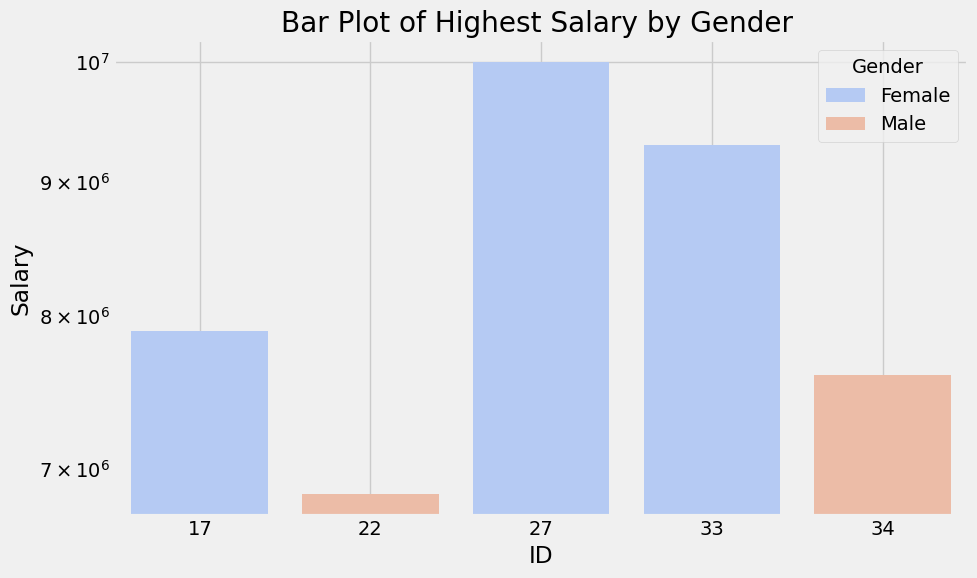

In [48]:
# Plotting the id and salary of top 5 employees along with gender
plt.figure(figsize=(10,6))
sns.barplot(x= x1,y=Top_five_highest_salary,hue = df['Gender'].loc[x1],errorbar=('ci', False),palette="coolwarm")
plt.yscale('log')
plt.title('Bar Plot of Highest Salary by Gender ')
plt.xlabel('ID')
plt.ylabel('Salary')
plt.tight_layout()
plt.grid(True)
plt.show()

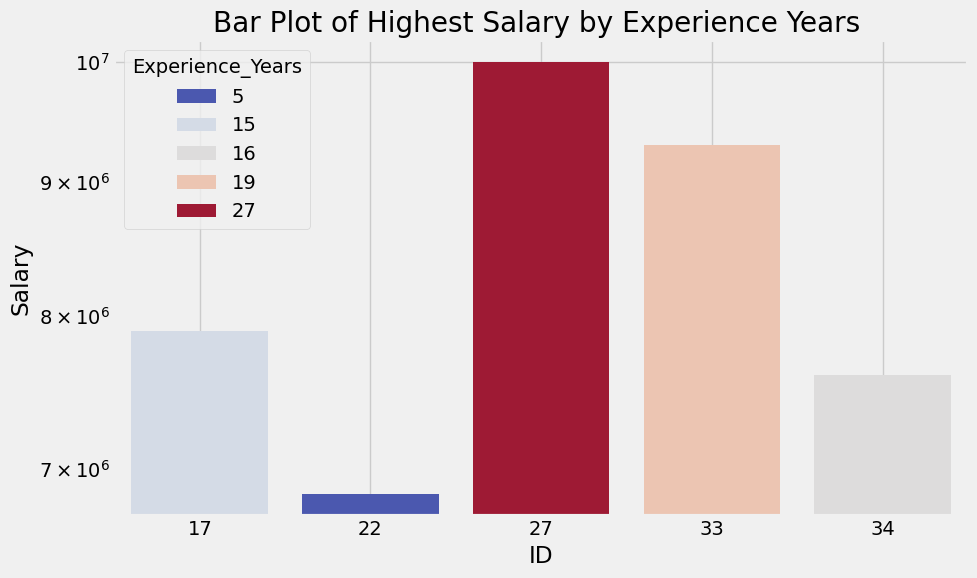

In [49]:
# Generate a bar plot showing the top five highest salaries with a logarithmic scale, grouped by years of experience.
plt.figure(figsize=(10,6))
sns.barplot(x= x1,y=Top_five_highest_salary,hue = df['Experience_Years'].loc[x1],errorbar=('ci', False),palette="coolwarm")
plt.yscale('log')
plt.title('Bar Plot of Highest Salary by Experience Years ')
plt.xlabel('ID')
plt.ylabel('Salary')
plt.tight_layout()
plt.grid(True)
plt.show()

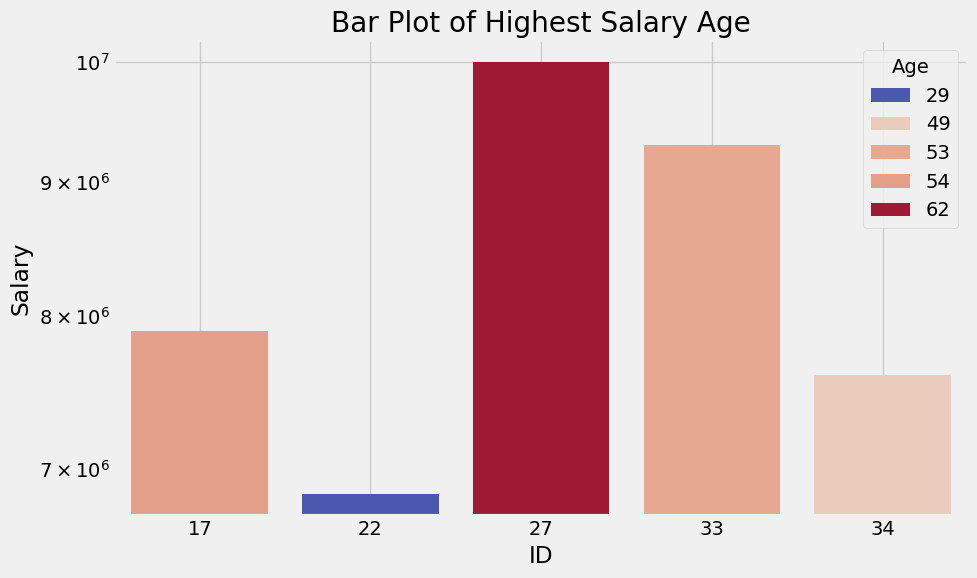

In [50]:
# Create a bar plot of the top five highest salaries with a logarithmic scale for better visual representation, grouped by age (hue).
plt.figure(figsize=(10,6))
sns.barplot(x= x1,y=Top_five_highest_salary,hue = df1['Age'].loc[x1],errorbar=('ci', False),palette="coolwarm")
plt.yscale('log')
plt.title('Bar Plot of Highest Salary Age')
plt.xlabel('ID')
plt.ylabel('Salary')
plt.tight_layout()
plt.grid(True)
plt.show()

In [51]:
# Sorting values based on gender
df.sort_values('Gender',ascending=False).head()

,ID,Experience_Years,Age,Gender,Salary
34,35,16,49,Male,7600000
11,12,6,29,Male,1400000
22,23,5,29,Male,6845000
21,22,4,26,Male,25000
20,21,15,54,Male,6570000


In [52]:
# Filter the DataFrame to separate male and female records
female=df[df['Gender']=='Female']  # Data for female individuals
male=df[df['Gender']=='Male']  # Data for male individuals
# Sort the records by 'Salary' in descending order and select the top 5 highest salaries for each gender
top_five_female=female.sort_values('Salary',ascending=False).head()
top_five_male=male.sort_values('Salary',ascending=False).head()

In [53]:
top_five_female

,ID,Experience_Years,Age,Gender,Salary
27,28,27,62,Female,10000000
33,34,19,53,Female,9300000
17,18,15,54,Female,7900000
28,29,19,54,Female,5000000
32,33,20,55,Female,1540000


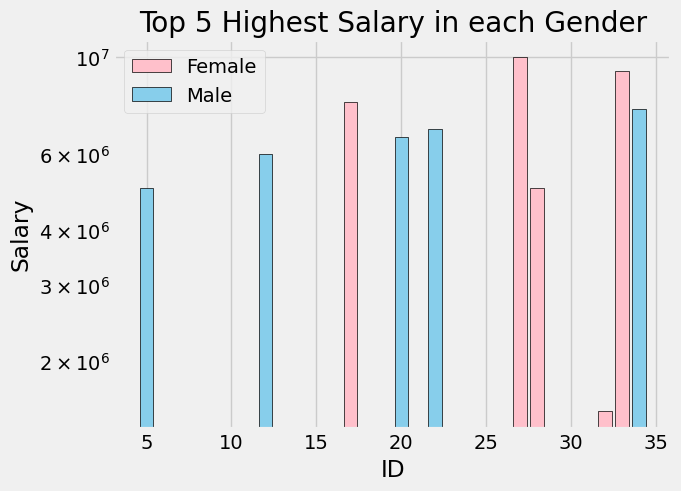

In [54]:
# Create a comparative bar plot to visualize the top 5 highest salaries for each gender,a logarithmic scale for the y-axis.
plt.bar(top_five_female.index,top_five_female['Salary'],color='pink',edgecolor='black',label='Female')
plt.bar(top_five_male.index,top_five_male['Salary'],color='skyblue',edgecolor='black',label='Male')
plt.xlabel('ID')
plt.ylabel('Salary')
plt.yscale('log')
plt.title('Top 5 Highest Salary in each Gender')
plt.legend()
plt.grid(True)
plt.show()

##Histogram

Text(0, 0.5, 'Frequency')

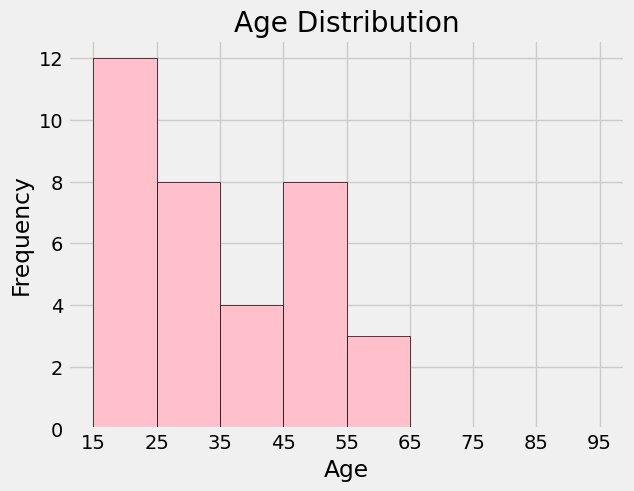

In [55]:
# Plotting the Age Distribution
bins=np.arange(15,100,10)
plt.hist(df["Age"],bins=bins,color="pink",edgecolor="black")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.xticks(ticks=bins,label=bins)
plt.ylabel("Frequency")

In [56]:
# Counting the number of male and female employees in the dataset
gender_count=df['Gender'].value_counts()
gender_count

,count
Gender,
Female,18
Male,17


##Pie Plot

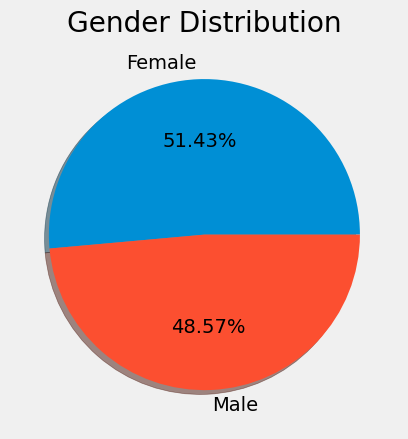

In [57]:
# Pie chart showing the percentage distribution of genders.
plt.pie(gender_count,labels=gender_count.index,autopct="%1.2f%%",shadow=True)
plt.title("Gender Distribution")
plt.show()

##Scatter plot

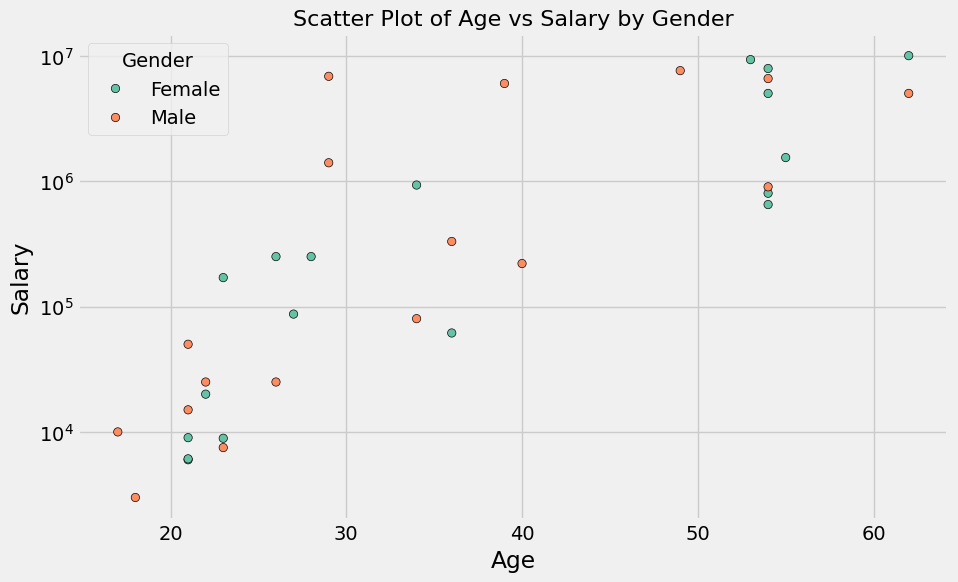

In [58]:
# Scatter plot of Age vs. Salary by Gender with a logarithmic scale for Salary.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Gender', edgecolor='black', palette='Set2')
plt.title('Scatter Plot of Age vs Salary by Gender', fontsize=16)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.yscale('log')
plt.show()